## Cognifyz Technologies Internship

Importing modules

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data

In [54]:
data = pd.read_csv("Dataset .csv")

Checking 5 data fields 

In [55]:
print(data.head(5))

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

#### Level 1

#### Task 1 : Top Cuisines

-> Determine the top three most common cuisines in the dataset

In [56]:
# Split cuisines into a single list of all cuisines

all_cuisines = data['Cuisines'].dropna().str.split(',').explode().str.strip()
print(all_cuisines)

0                French
0              Japanese
0              Desserts
1              Japanese
2               Seafood
             ...       
9547               Cafe
9548            Italian
9548      World Cuisine
9549    Restaurant Cafe
9550               Cafe
Name: Cuisines, Length: 19710, dtype: object


In [57]:
# Count the frequency of each cuisine

cuisine_counts = all_cuisines.value_counts()
print(cuisine_counts)

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64


In [58]:
# Getting top 3 most common cuisines

top3_cuisine = cuisine_counts.head(3)
print('Top 3 most common cuisines are:')
print(top3_cuisine)

Top 3 most common cuisines are:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


-> Calculate the percentage of restaurants that serve each of the top cuisines

In [59]:
# Calculate total number of restaurants

total_restaurants = len(data)
print(total_restaurants)

9551


In [60]:
# Calculate the percentage of restaurants serving each cuisine

cuisine_percentages = (cuisine_counts / total_restaurants) * 100
print(cuisine_percentages)

Cuisines
North Indian      41.461627
Chinese           28.635745
Fast Food         20.793634
Mughlai           10.417757
Italian            7.999162
                    ...    
Fish and Chips     0.010470
Malwani            0.010470
Cuisine Varies     0.010470
Soul Food          0.010470
B�_rek             0.010470
Name: count, Length: 145, dtype: float64


In [61]:
# Display the top 3 cuisines with percentages

top3_cuisine_percentages = cuisine_percentages.round(2).head(3)
print("Top Cuisines with Percentage of Restaurants:")
print(top3_cuisine_percentages)

Top Cuisines with Percentage of Restaurants:
Cuisines
North Indian    41.46
Chinese         28.64
Fast Food       20.79
Name: count, dtype: float64


#### Level 1

#### Task 2 : City Analysis

-> Identify the city with the highest number of restaurants in the dataset

In [62]:
# Count the number of restaurants in each city
city_counts = data['City'].value_counts()
print(city_counts)

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [63]:
# Identify the city with the highest number of restaurants
print('The city with the highest number of restaurant is:')
top_city = city_counts.head(1)
print(top_city)

The city with the highest number of restaurant is:
City
New Delhi    5473
Name: count, dtype: int64


-> Calculate the average rating for restaurants in each city

In [64]:
# ensuring the 'Aggregate Rating' is numeric (in case of any non numeric entries)
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')
print(data['Aggregate rating'])

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64


In [65]:
# Group by 'city' and calculate the average rating by each city
average_rating_by_city = data.groupby('City')['Aggregate rating'].mean()
print(average_rating_by_city)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [66]:
# Display the result
print("Average rating for restaurants in each city:")
print(average_rating_by_city.sort_values(ascending=False))

Average rating for restaurants in each city:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


-> Determine the city with the highest average rating

In [67]:
print("The city with highest average rating is:")
print(average_rating_by_city.sort_values(ascending=False).head(1))

The city with highest average rating is:
City
Inner City    4.9
Name: Aggregate rating, dtype: float64


#### Level 1

#### Task 3 : Price Range Distribution

-> Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants

In [68]:
# Counting the number of restaurants in each price range
price_range_counts = data['Price range'].value_counts().sort_index()
print(price_range_counts)

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


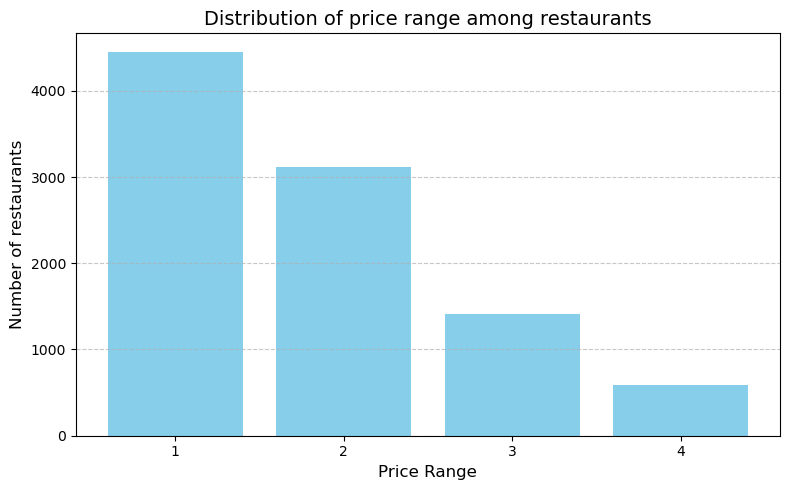

In [69]:
# Creating a bar chart for visualisation
plt.figure(figsize=(8,5))
plt.bar(price_range_counts.index, price_range_counts.values, color='skyblue')

# Adding labels and title
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of restaurants', fontsize=12)
plt.title('Distribution of price range among restaurants', fontsize=14)
plt.xticks(price_range_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the chart
plt.tight_layout()
plt.show()

-> Calculate the percentage of restaurants 
in each price range category

In [70]:
# Calculating total restaurants
total_restaurants = len(data)
print(total_restaurants)

9551


In [71]:
# Percentage of restaurants in each price range
percentage_of_restaurants = (price_range_counts/total_restaurants)*100
print('Percentage of restaurants in each price range :')
print(percentage_of_restaurants.round(2))

Percentage of restaurants in each price range :
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


#### Level 1

#### Task 4 :  Online Delivery

-> Determine the percentage of restaurants that offer online delivery

In [72]:
# Counting total restaurants that offers online delivery
total_online_delivery_restaurants = data['Has Online delivery'].str.lower().value_counts().get('yes')
print(total_online_delivery_restaurants)

2451


In [73]:
# Calculating total restaurants
total_restaurants = len(data)
print(total_restaurants)

9551


In [74]:
# Calculating percentage of restaurants that offer online delivery
percentage_of_restaurants_with_online_delivery = (total_online_delivery_restaurants/total_restaurants)*100
print('The percentage of restaurants that offer online delivery is : ', percentage_of_restaurants_with_online_delivery.round(2),'%')

The percentage of restaurants that offer online delivery is :  25.66 %


-> Compare the average ratings of restaurants with and without online delivery

In [75]:
# Ensuring the column 'Aggregate rating' is numeric
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')

# Normalizing the 'Has Online delivery' column to lowercase for consistency
data['Has Online delivery'] = data['Has Online delivery'].str.lower()

# Calculate Average of 'Aggregate rating' group by 'Has Online delivery'
average_ratings = data.groupby('Has Online delivery')['Aggregate rating'].mean()

# Display the result
print("Average ratings of restaurants based on online delivery availability:")
print(average_ratings.round(2))

Average ratings of restaurants based on online delivery availability:
Has Online delivery
no     2.47
yes    3.25
Name: Aggregate rating, dtype: float64


#### Level 2

#### Task 1 : Restaurant ratings

-> Analyze the distribution of aggregate ratings and determine the most common rating range

In [76]:
# Ensuring the 'Aggregate rating' column is numeric
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')

# Using dropna to make sure 'Aggregate rating' has no NaN values
ratings = data['Aggregate rating'].dropna()

# Defining bins for the rating ranges
bins = [0,1,2,3,4,5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

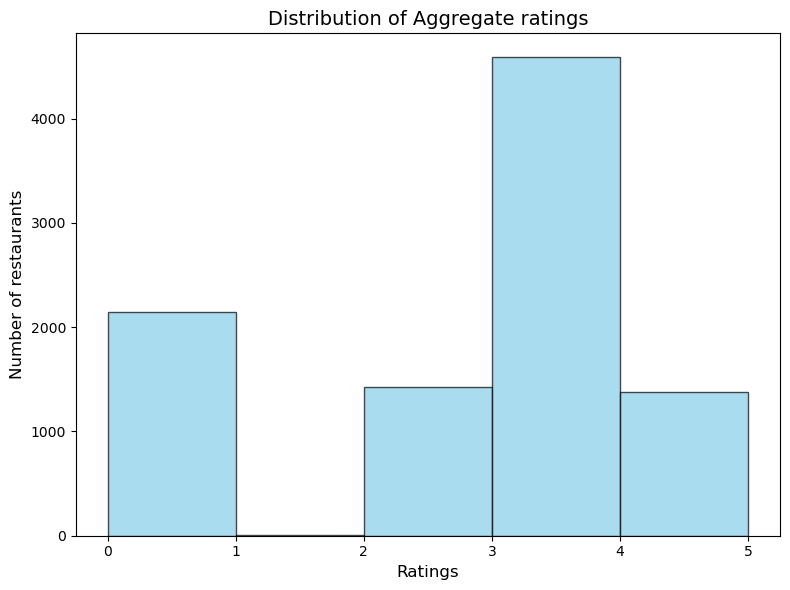

In [77]:
# Creating a histogram chart for analyzing
plt.figure(figsize=(8,6))
plt.hist(ratings, bins=bins, edgecolor='black', color='skyblue', alpha=0.7)

# Adding labels and title
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of restaurants', fontsize=12)
plt.title('Distribution of Aggregate ratings', fontsize=14)

# Showing the chart
plt.tight_layout()
plt.show()

In [78]:
# Analyzing the most common rating
rating_counts = pd.cut(ratings, bins=bins, labels=labels, right=False).value_counts().sort_index()
print(rating_counts)

Aggregate rating
0-1    2148
1-2       3
2-3    1430
3-4    4590
4-5    1380
Name: count, dtype: int64


In [79]:
# Printing the result
print('Most common Rating range :', rating_counts.idxmax())
print('Number of restaurants :', rating_counts.max())

Most common Rating range : 3-4
Number of restaurants : 4590


-> Calculate the average number of votes received by restaurants

In [80]:
# Ensuring that 'Votes' column contains only numeric values
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Checking that 'Votes' column has NaN or not
votes = data['Votes'].dropna()

# Calculating average votes received by restaurant
average_votes = votes.mean()
print("Average votes received by restaurants is :", average_votes.round())

Average votes received by restaurants is : 157.0


#### Level 2

#### Task 2 : Cuiusine Combination

-> Identify the most common combinations of cuisines in the dataset

In [81]:
# Dropping missing values from the 'Cuisines' column
cuisines = data['Cuisines'].dropna()

# Counting values of each cuisines 
cuisines = cuisines.value_counts()

# Printing top 10 common cuisines
print('Top 10 most common cuisines are :', cuisines.head(10))

Top 10 most common cuisines are : Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


-> Determine if certain cuisine combinations 
tend to have higher ratings

In [82]:
# Ensuing the column 'Aggregate rating' has only numeric values  
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')

# Checking if there any missing values on 'Aggregate rating' and 'Cuisines' columns
data_cleaned = data.dropna(subset=['Aggregate rating', 'Cuisines'])

high_rated_cuisines = data_cleaned.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print('Top 10 Cuisines with highest ratings are :') 
print(high_rated_cuisines.head(10))

Top 10 Cuisines with highest ratings are :
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


#### Level 2

#### Task 3 : Geographic Analysis

-> Plot the locations of restaurants on a map using longitude and latitude coordinates

In [83]:
# importing folium module for this
import folium
from folium.plugins import MarkerCluster

In [84]:
# Droping empty values in 'Latitude' and 'Longitude' column
data_cleaned = data.dropna(subset=['Latitude', 'Longitude'])
data_cleaned['Latitude'] = pd.to_numeric(data_cleaned['Latitude'], errors='coerce')
data_cleaned['Longitude'] = pd.to_numeric(data_cleaned['Longitude'], errors='coerce')

# Initialized map centered in the mean position
map_center = [data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=1)

# Adding markers for each restaurant
marker_cluster = MarkerCluster().add_to(restaurant_map)
for _, row in data_cleaned.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['Cuisines']})",
        tooltip=row['Restaurant Name']
    ).add_to(marker_cluster)

# Save the map to an HTML file
restaurant_map.save("restaurants_map.html")

# Display a message
print("Map created and saved as 'restaurants_map.html'. Open this file to view the map.")

Map created and saved as 'restaurants_map.html'. Open this file to view the map.


In [85]:
from IPython.display import IFrame

# Display the HTML map file
IFrame(src='restaurants_map.html', width=700, height=500)

-> Identify any patterns or clusters of restaurants in specific areas

In [86]:
from folium.plugins import HeatMap

# Prepare data for the heatmap
heatmap_data = data_cleaned[['Latitude', 'Longitude']].values.tolist()

# Add heatmap layer to the map
HeatMap(heatmap_data).add_to(restaurant_map)

# Save the map
restaurant_map.save("restaurants_heatmap.html")
print("Heatmap created and saved as 'restaurants_heatmap.html'.")

Heatmap created and saved as 'restaurants_heatmap.html'.


In [87]:
from IPython.display import IFrame

# Display the HTML map file
IFrame(src='restaurants_heatmap.html', width=700, height=500)

#### Level 2

#### Task 4 : Restaurant Chains

-> Identify if there are any restaurant chains present in the dataset

In [88]:
# Group by restaurant name and its occurance
restaurant_counts = data['Restaurant Name'].value_counts()

# Filtering for restaurant chains
restaurant_chains = restaurant_counts[restaurant_counts > 1]

print("Restaurant chains and their occurance")
print(restaurant_chains)

Restaurant chains and their occurance
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


-> Analyze the ratings and popularity of different restaurant chains

In [89]:
# Adding the details of only the chain restaurants in a dataframe
chains_df = data_cleaned[data_cleaned['Restaurant Name'].isin(restaurant_chains.index)]

# Group by restaurant name
chain_stats = chains_df.groupby('Restaurant Name').agg({
    'Aggregate rating' : 'mean',
    'Votes' : 'sum',
    'City' : 'nunique'
}).reset_index()

chain_stats.rename(columns={
    'Aggregate rating' : 'Average Rating',
    'Votes' : 'Total votes',
    'City' : 'Cities covered'
}, inplace=True)

print(chain_stats)

          Restaurant Name  Average Rating  Total votes  Cities covered
0       10 Downing Street        4.000000          670               2
1      221 B Baker Street        3.366667          215               1
2      34 Parkstreet Lane        3.050000           31               1
3    34, Chowringhee Lane        2.791667          777               1
4          4700BC Popcorn        3.500000          176               1
..                    ...             ...          ...             ...
729                 Zaika        2.850000          245               2
730     Zaika Kathi Rolls        1.500000           16               2
731                  Zizo        3.866667         1371               3
732       Zooby's Kitchen        3.150000           52               2
733                bu��no        3.750000          117               1

[734 rows x 4 columns]


#### Level 3

#### Task 1 : Restaurant Reviews

-> Analyze the text reviews to identify the most common positive and negative keywords

In [90]:
# Getting unique rating names
unique_ratings = data['Rating text'].unique()
print(f"All rating texts : {unique_ratings}")

All rating texts : ['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']


In [91]:
# Making positive and negative rating arrays
positive_reviews = ['Excellent', 'Very Good', 'Good']
negative_reviews = ['Average', 'Poor']

# Making diffent List of reviews
positive_rating_data = data[data['Rating text'].isin(positive_reviews)]
negative_rating_data = data[data['Rating text'].isin(negative_reviews)]

positive_rating_data = positive_rating_data['Rating text'].value_counts()
negative_rating_data = negative_rating_data['Rating text'].value_counts()

# Printing the result
print(f"Most common positive review keyword is {positive_rating_data.idxmax()} and its counts are {positive_rating_data.max()}")
print(f"Most common negative review keyword is {negative_rating_data.idxmax()} and its counts are {negative_rating_data.max()}")

Most common positive review keyword is Good and its counts are 2100
Most common negative review keyword is Average and its counts are 3737


-> Calculate the average length of reviews and explore if there is a relationship between
review length and rating

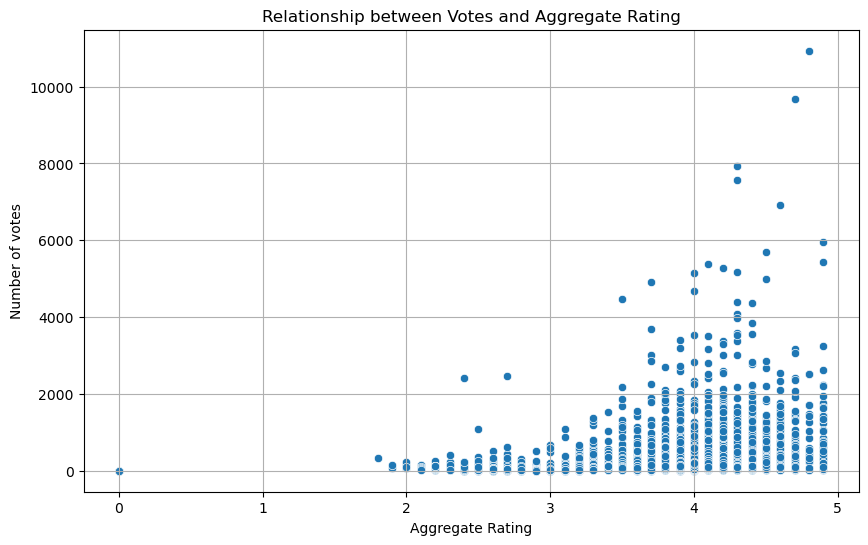

In [92]:
# Scatter plot: Review length vs. Aggregate rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Aggregate rating'], y=data['Votes'])
plt.title("Relationship between Votes and Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of votes")
plt.grid(True)
plt.show()

#### Level 3

#### Task 2 : Votes Analysis

-> Identify the restaurants with the highest and lowest number of votes

In [93]:
# Getting maximum voted restaurant row
max_voted_restaurant = data.loc[data['Votes'].idxmax()]

# Printing the result
print(f"Restaurant with maximum votes is {max_voted_restaurant['Restaurant Name']} with {max_voted_restaurant['Votes']} votes")

# Getting minimum voted restaurant row
min_voted_restaurant = data.loc[data['Votes'].idxmin()]
print(f"Restaurant with minimum votes is {min_voted_restaurant['Restaurant Name']} with {min_voted_restaurant['Votes']} votes")

Restaurant with maximum votes is Toit with 10934 votes
Restaurant with minimum votes is Cantinho da Gula with 0 votes


-> Analyze if there is a correlation between the number of votes and the rating of a restaurant

Correlation between Votes and Aggregate Rating: 0.31


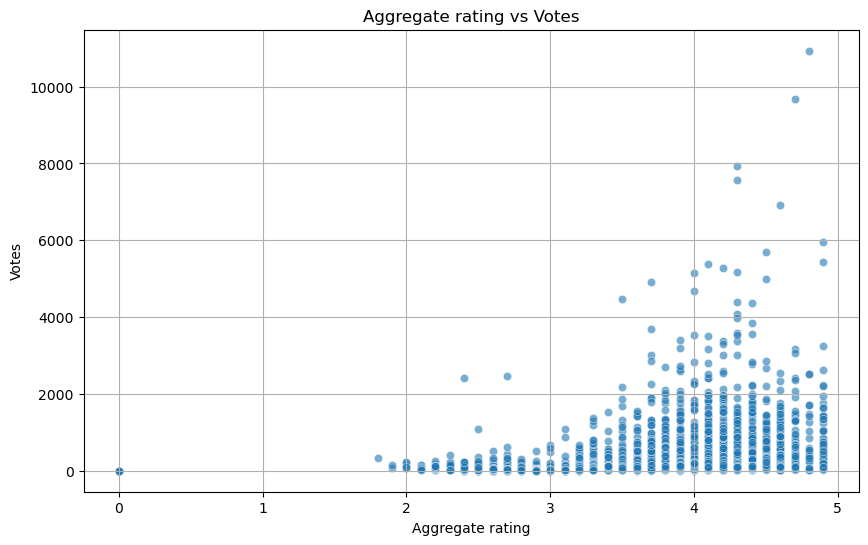

In [94]:
# Ensuring is there any non numeric values
votes_and_ratings_data = data[['Votes','Aggregate rating']].dropna()

# Calculating the correlation coefficient
correlation_coefficient = votes_and_ratings_data['Votes'].corr(votes_and_ratings_data['Aggregate rating'])
print(f"Correlation between Votes and Aggregate Rating: {correlation_coefficient:.2f}")

# Plotting a scatterplot to visualize the relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x=votes_and_ratings_data['Aggregate rating'], y=votes_and_ratings_data['Votes'], alpha=0.6)
plt.xlabel("Aggregate rating")
plt.ylabel("Votes")
plt.title("Aggregate rating vs Votes")
plt.grid(True)
plt.show()

#### Level 3

#### Task 3 :  Price Range vs. Online Delivery and Table Booking

-> Analyze if there is a relationship between the price range and the availability of online
delivery and table booking

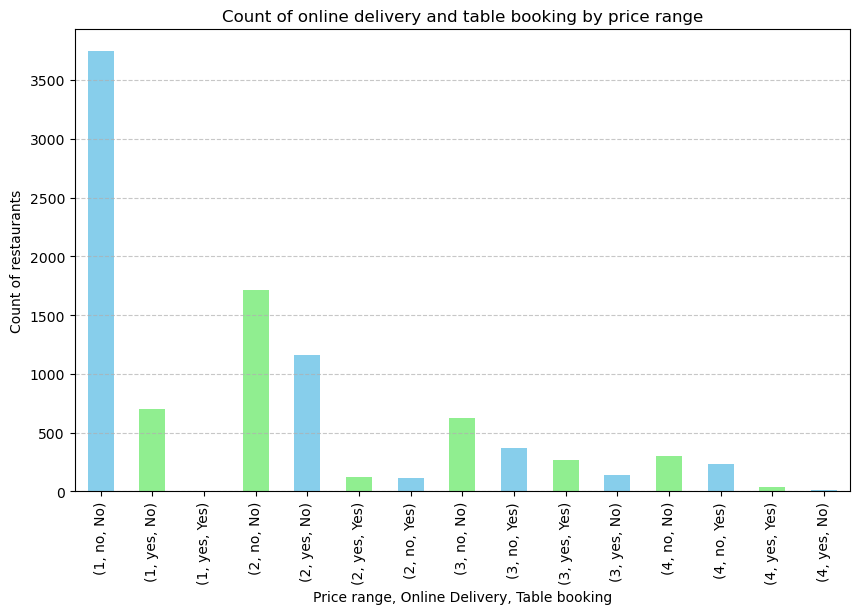

In [95]:
newData = data.groupby(['Price range'])[['Has Online delivery','Has Table booking']].value_counts()

newData.plot(kind='bar', figsize=(10,6), color=['skyblue', 'lightgreen'])
plt.title("Count of online delivery and table booking by price range")
plt.ylabel("Count of restaurants")
plt.xlabel("Price range, Online Delivery, Table booking")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

-> Determine if higher-priced restaurants are more likely to offer these services

In [98]:
# Making the data binary to get mean value
data['Has Online delivery'] = data['Has Online delivery'].map({'yes': 1, 'no': 0})
data['Has Table booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})

# Getting the mean value
service_proportions = data.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean() * 100

# Printing the result
print(service_proportions)

             Has Online delivery  Has Table booking
Price range                                        
1                      15.774077           0.022502
2                      41.310633           7.677482
3                      29.190341          45.738636
4                       9.044369          46.757679


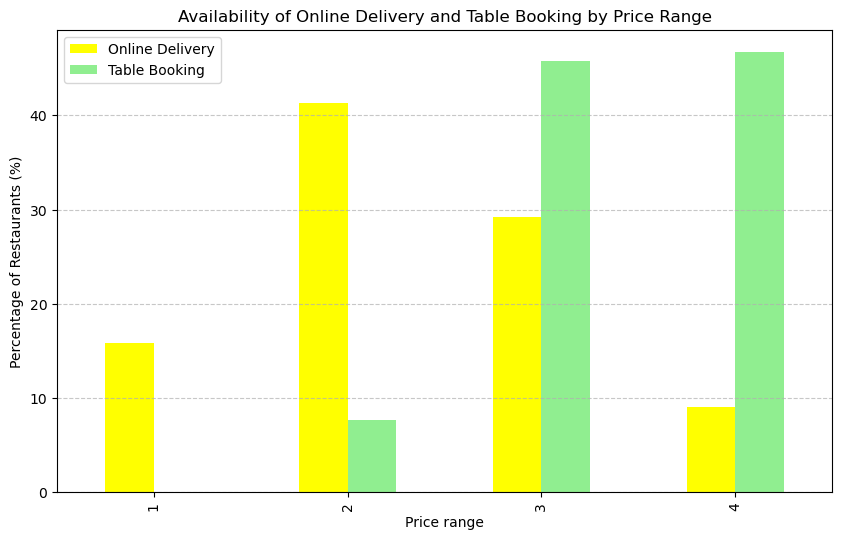

In [99]:
# Visualizing the whole thing
service_proportions.plot(kind='bar', figsize=(10,6), color=['yellow', 'lightgreen'])
plt.title("Availability of Online Delivery and Table Booking by Price Range")
plt.xlabel("Price range")
plt.ylabel("Percentage of Restaurants (%)")
plt.legend(["Online Delivery", "Table Booking"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()